# Vectorization with Tensorflow 2.0



In [4]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import time

#### Check if a gpu is available to perform the vector operations

In [31]:
tf.test.is_gpu_available()

True

### Adding two arrays

In [16]:
a = np.array([10, 2, 3, 4])
b = np.array([2, 3, 4, 5])

In [30]:
tf.add(a, b)

<tf.Tensor: id=58, shape=(4,), dtype=int32, numpy=array([3, 5, 7, 9])>

The add function of tensorflow can also be used to add an array and a number

In [29]:
tf.add(a, 1)

<tf.Tensor: id=55, shape=(4,), dtype=int32, numpy=array([2, 3, 4, 5])>

### Multiplying / Dividing an array with a number

In [28]:
tf.multiply(a, 2)

<tf.Tensor: id=52, shape=(4,), dtype=int32, numpy=array([2, 4, 6, 8])>

In [19]:
tf.divide(a, 2)

array([5. , 1. , 1.5, 2. ])

### Doing a dot product

A dot product for two arrays using numpy is very easy. It can be done as follows:

In [7]:
np.dot(a, b)

40

#### Doing a dot product using tensorflow

We can use matrix multiplication to do dot product between the two arrays. However, before doing matrix multiplication you need to reshape the arrays to explicitly shape them from (x,) shape to (1, x) shape for the first array and from (x,) shape to (x, 1) shape for the the second array. This will make the end result to be a (1,1) array giving us the dot product.

In [17]:
prod = tf.matmul(a.reshape(1, 4), b.reshape(4, 1))

In [18]:
prod, prod.shape

(<tf.Tensor: id=19, shape=(1, 1), dtype=int32, numpy=array([[40]])>,
 TensorShape([1, 1]))

### Squaring an array

In [19]:
tf.square(a)

<tf.Tensor: id=21, shape=(4,), dtype=int32, numpy=array([ 1,  4,  9, 16])>

### Summing up all values in an array

In [22]:
sm = tf.reduce_sum(a)

#### Getting the value of the result

In [26]:
sm.numpy()

10

Reduce sum works similarly for matrices as well

In [27]:
tf.reduce_sum([a, b])

<tf.Tensor: id=49, shape=(), dtype=int32, numpy=24>

### Doing a matrix multiplication

matmul function of tensorflow is used for doing matrix multiplication. Before doing the matrix multiplication, care must be taken to make sure that the matrices are multipliable.

In [32]:
tf.matmul(a.reshape(4, 1), b.reshape(1, 4))

<tf.Tensor: id=61, shape=(4, 4), dtype=int32, numpy=
array([[ 2,  3,  4,  5],
       [ 4,  6,  8, 10],
       [ 6,  9, 12, 15],
       [ 8, 12, 16, 20]])>

### Selecing the device (CPU/GPU) on which to perform the vector operations

To select the device we use the compute the vector operations, we use the context of the device as follows:

```python
with tf.device("CPU:0") # or GPU:0 if we want to run it on a gpu
    # vector operations
```

## Benchmarking CPU and GPU on large matrix operations

To benchmark the performance of the vector operations running on CPU and GPU, we'll need a sufficiently large number where the GPU can shine. I've selected 10000 * 10000 shaped matrix with uniform random values. This matrix will be multiplied with itself and the performance will be measured. We'll select numpy matrix multiplication as a baseline to compare tensorflow's performance on CPU and GPU

#### Running the matrix multiplication using numpy

In [10]:
x = np.random.uniform(size=10000 *10000)
x = x.reshape(10000, 10000)
start = time.time()
np.matmul(x, x)
end = time.time()

print("Numpy CPU Time {0:.2f}s".format(end - start))

Numpy CPU Time 10.34s


#### Running the matrix multiplication using TensorFlow on CPU

In [11]:
print("Running on CPU")

with tf.device("CPU:0"):
    x = tf.random.uniform([10000, 10000])
    start = time.time()
    tf.matmul(x, x)
    end = time.time()

print("CPU Time: {0:.2f}s".format(end - start))

Running on CPU
CPU Time: 5.16s


#### Running the matrix multiplication using TensorFlow on GPU

In [17]:
print("Running on GPU")

with tf.device("GPU:0"):
    x = tf.random.uniform([10000, 10000])
    start = time.time()
    tf.matmul(x, x)
    end = time.time()
    
print("GPU Time: {0}s".format(end - start))

Running on GPU
GPU Time: 0.0009968280792236328s


In [11]:
df = pd.DataFrame({"devices": ["Numpy CPU", "TF2 CPU", "TF2 GPU"], "performance": [10.34, 5.16, 0.27]})

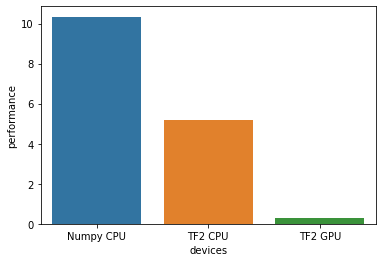

In [12]:
ax = sns.barplot(x = "devices", y = "performance", data=df)

#### Results

As seen in the above graph, for such a massive calculation, using tensorflow 2.0 on GPU gives a massive boost in performance for the matrix multiplication operation. Even running the matrix multiplication operation on CPU using tensorflow reduces the time it takes to compute matmul by half.